In [1]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from seaborn import heatmap
from xgboost import XGBClassifier
from matplotlib import pyplot as plt

import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

np.random.seed(89)

In [2]:
df = pd.read_csv('../data-pipeline/data_final.csv')
df.head()

,word_freq_money,word_freq_income,word_freq_bankruptcy,word_freq_credit,word_freq_debt,word_freq_all,word_freq_full,word_freq_refund,word_freq_claims,word_freq_deal,...,char_freq_$,char_freq_),char_freq_[,link_freq,num_words,length_of_text,longest_word_length,num_of_html_tags,is_html,target
0,0,0,0,0,0,5,1,0,0,0,...,35,52,3,1,1011,5440.0,85,2,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,163,760.0,29,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,238,1103.0,53,2,1,0
3,0,0,0,0,0,5,1,0,0,0,...,35,52,3,3,1244,5877.0,69,3,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,63,276.0,19,0,0,0


Exploratory Data Analysis

In [3]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,word_freq_money,word_freq_income,word_freq_bankruptcy,word_freq_credit,word_freq_debt,word_freq_all,word_freq_full,word_freq_refund,word_freq_claims,word_freq_deal,...,char_freq_$,char_freq_),char_freq_[,link_freq,num_words,length_of_text,longest_word_length,num_of_html_tags,is_html,target
0,0,0,0,0,0,0,0,0,0,0,...,0,5,0,1,101,723.0,52,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,19,144.0,41,0,0,1
2,0,0,0,0,0,2,0,0,0,0,...,0,0,0,1,140,1061.0,54,44,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,144,861.0,52,2,1,0
4,0,0,0,0,0,1,1,0,0,0,...,0,10,0,1,606,2889.0,41,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,153,747.0,37,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,3,0,3,141,781.0,41,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,3,0,3,156,912.0,47,0,0,0
8,0,0,0,0,0,2,0,0,0,0,...,0,2,4,3,224,1284.0,50,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,94,562.0,48,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   word_freq_money         5835 non-null   int64  
 1   word_freq_income        5835 non-null   int64  
 2   word_freq_bankruptcy    5835 non-null   int64  
 3   word_freq_credit        5835 non-null   int64  
 4   word_freq_debt          5835 non-null   int64  
 5   word_freq_all           5835 non-null   int64  
 6   word_freq_full          5835 non-null   int64  
 7   word_freq_refund        5835 non-null   int64  
 8   word_freq_claims        5835 non-null   int64  
 9   word_freq_deal          5835 non-null   int64  
 10  word_freq_card          5835 non-null   int64  
 11  word_freq_click here    5835 non-null   int64  
 12  word_freq_exclusive     5835 non-null   int64  
 13  word_freq_apply online  5835 non-null   int64  
 14  word_freq_winner        5835 non-null   

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_money,5835.0,0.222965,1.321672,0.0,0.0,0.0,0.0,23.0
word_freq_income,5835.0,0.054841,0.390242,0.0,0.0,0.0,0.0,7.0
word_freq_bankruptcy,5835.0,0.008740,0.244429,0.0,0.0,0.0,0.0,16.0
word_freq_credit,5835.0,0.111225,0.659938,0.0,0.0,0.0,0.0,16.0
word_freq_debt,5835.0,0.023822,0.278866,0.0,0.0,0.0,0.0,8.0
word_freq_all,5835.0,0.704370,1.600000,0.0,0.0,0.0,1.0,24.0
word_freq_full,5835.0,0.068209,0.307280,0.0,0.0,0.0,0.0,6.0
word_freq_refund,5835.0,0.008226,0.138312,0.0,0.0,0.0,0.0,6.0
word_freq_claims,5835.0,0.056727,0.515815,0.0,0.0,0.0,0.0,23.0
word_freq_deal,5835.0,0.087746,0.521573,0.0,0.0,0.0,0.0,16.0


array([[<Axes: title={'center': 'word_freq_money'}>,
        <Axes: title={'center': 'word_freq_income'}>,
        <Axes: title={'center': 'word_freq_bankruptcy'}>,
        <Axes: title={'center': 'word_freq_credit'}>,
        <Axes: title={'center': 'word_freq_debt'}>,
        <Axes: title={'center': 'word_freq_all'}>],
       [<Axes: title={'center': 'word_freq_full'}>,
        <Axes: title={'center': 'word_freq_refund'}>,
        <Axes: title={'center': 'word_freq_claims'}>,
        <Axes: title={'center': 'word_freq_deal'}>,
        <Axes: title={'center': 'word_freq_card'}>,
        <Axes: title={'center': 'word_freq_click here'}>],
       [<Axes: title={'center': 'word_freq_exclusive'}>,
        <Axes: title={'center': 'word_freq_apply online'}>,
        <Axes: title={'center': 'word_freq_winner'}>,
        <Axes: title={'center': 'word_freq_cash'}>,
        <Axes: title={'center': 'word_freq_fast'}>,
        <Axes: title={'center': 'word_freq_earn'}>],
       [<Axes: title={'cen

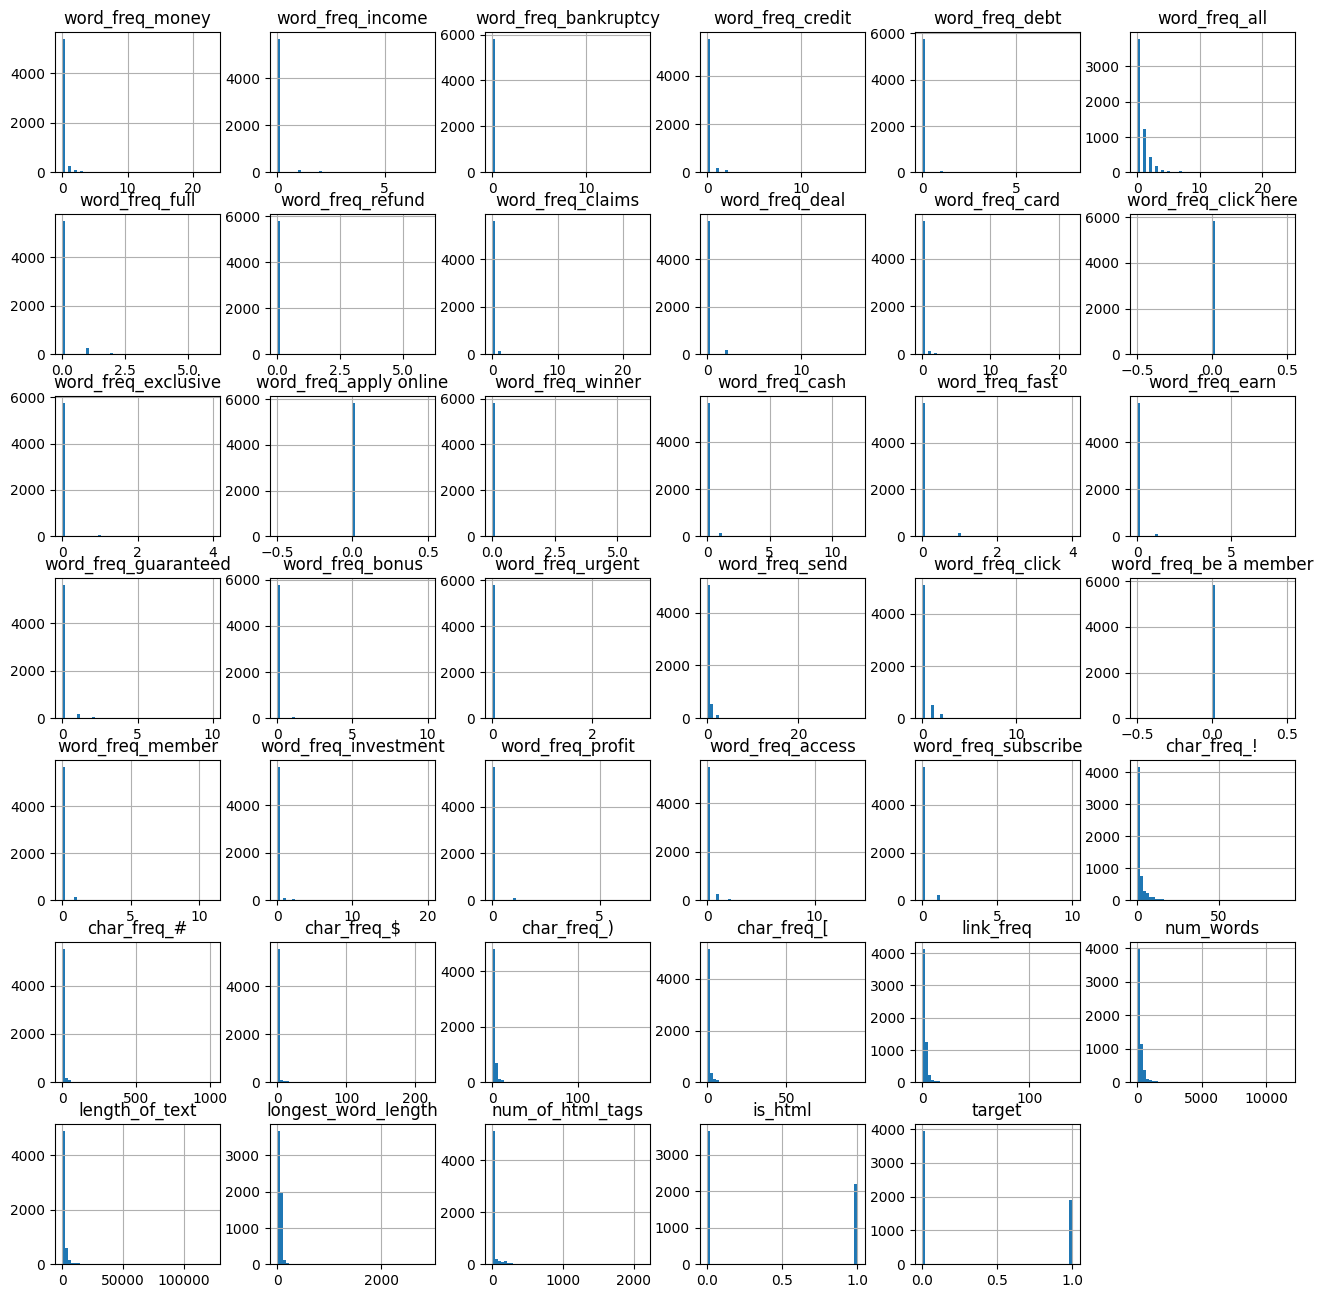

In [6]:
df.hist(figsize=(16, 16), bins=50)

Feature Selection

<Axes: >

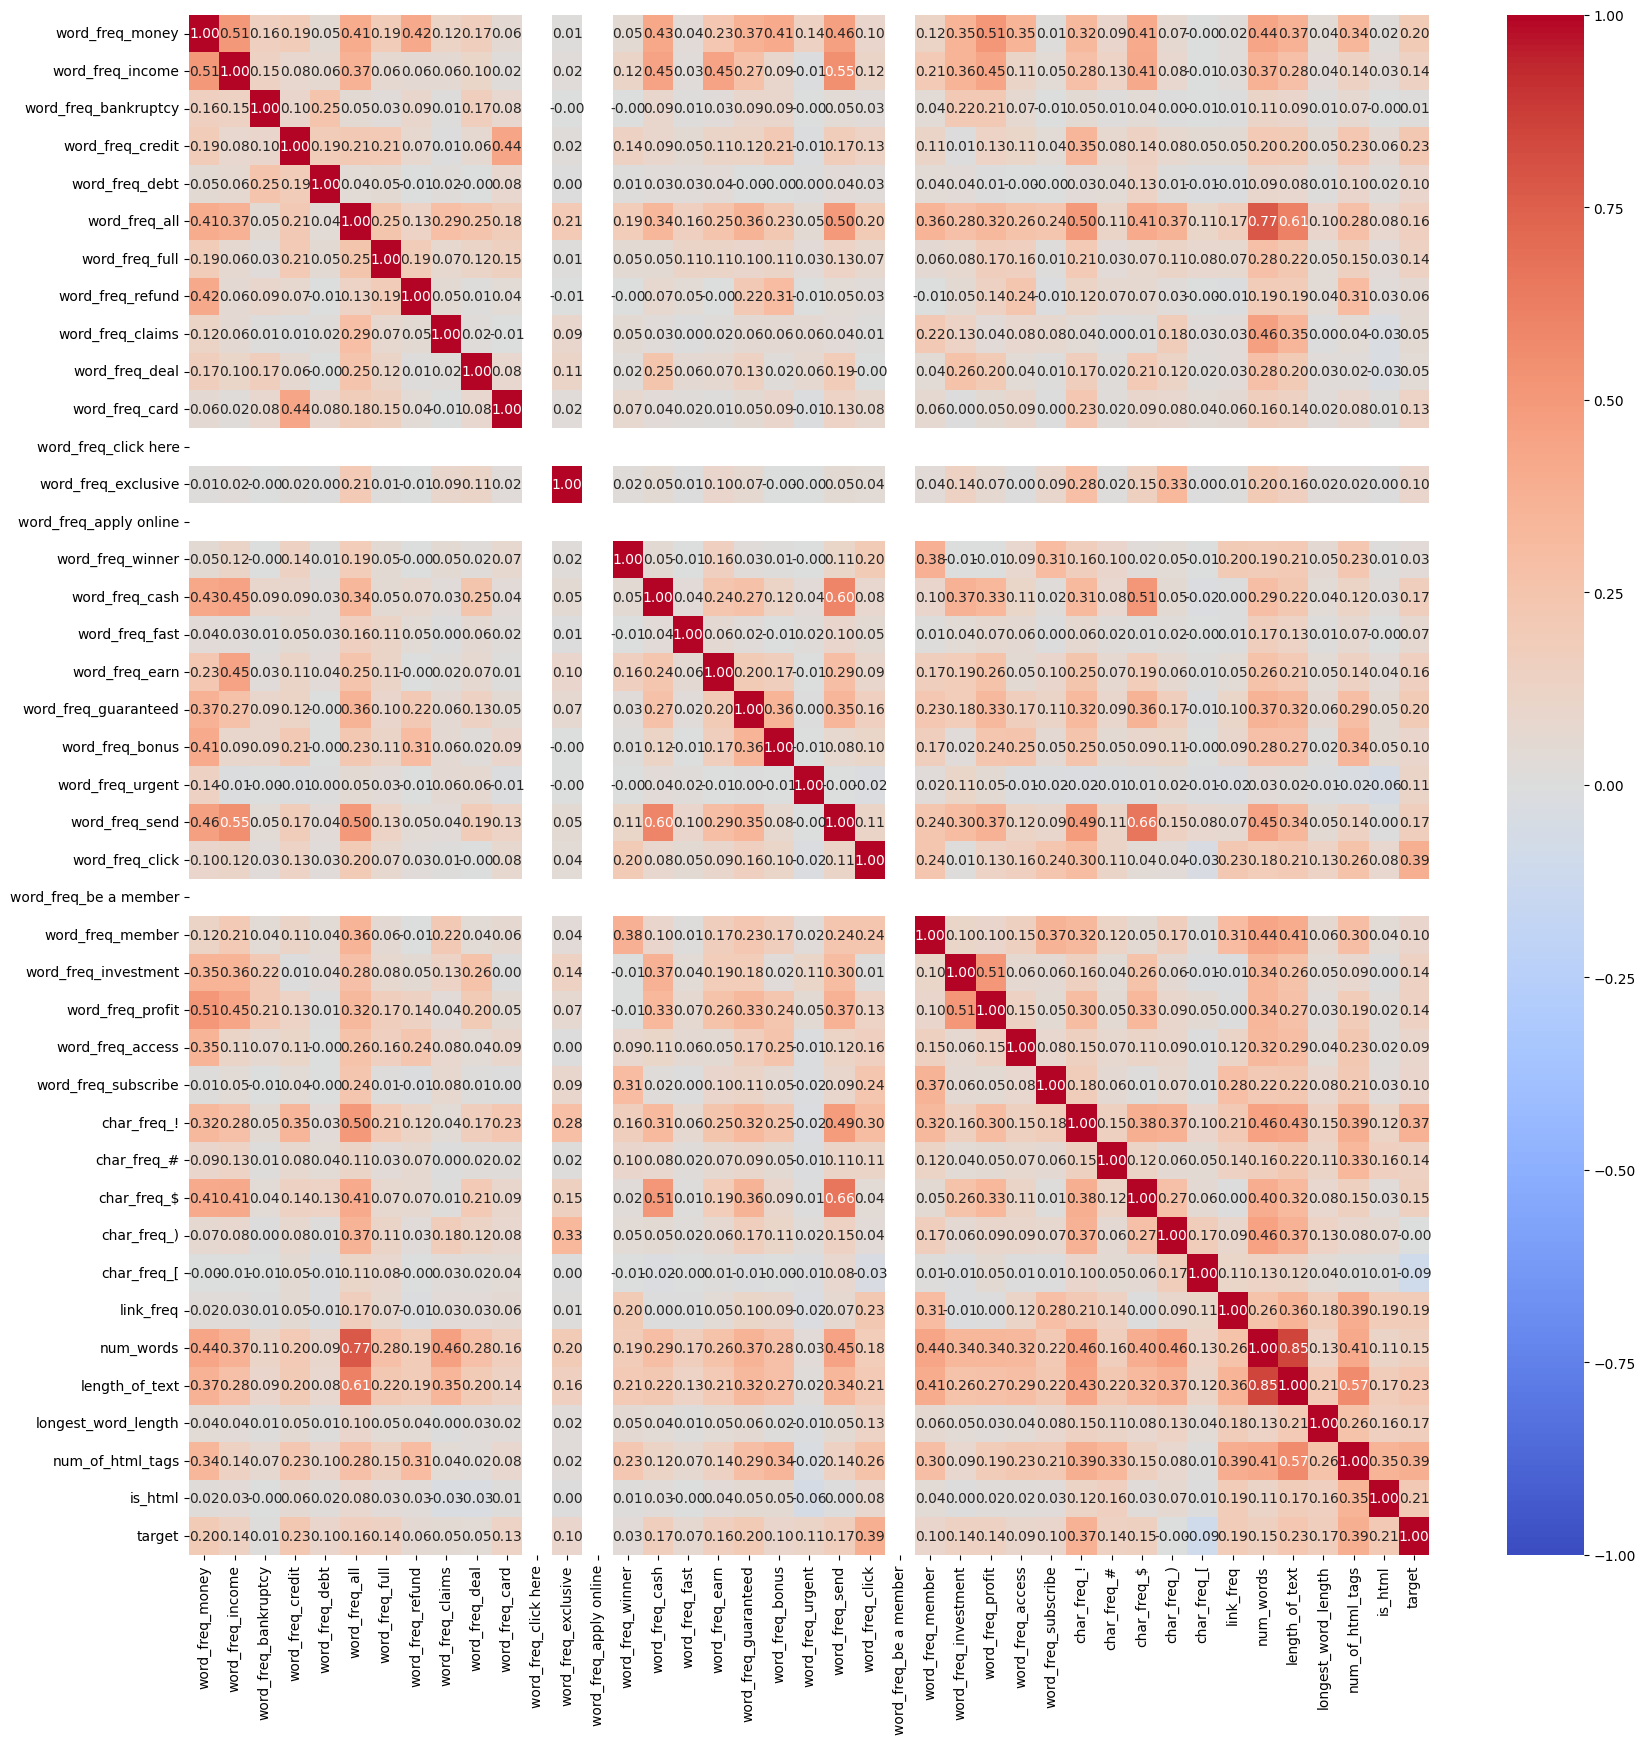

In [7]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)

In [8]:
corr_dict = dict(df.drop("target", axis=1).apply(lambda x: x.corr(df.target)))
corr_dict = sorted(((value,key) for key,value in corr_dict.items()))
corr_dict.reverse()

for key, value in corr_dict:
    print(key, value)

0.3705072959783013 char_freq_!
0.23008544517434398 length_of_text
nan word_freq_be a member
0.3874654102054798 word_freq_click
0.38565837177513845 num_of_html_tags
0.21489233288294946 is_html
0.19752610282779023 word_freq_guaranteed
nan word_freq_apply online
nan word_freq_click here
0.22594395699092226 word_freq_credit
0.19626295850023057 word_freq_money
0.1921889699392573 link_freq
0.17167386721819164 word_freq_cash
0.16685789029430698 word_freq_send
0.16614253886894448 longest_word_length
0.15935302846286012 word_freq_earn
0.15665110332042534 word_freq_all
0.15483829289897724 char_freq_$
0.1523330319681438 num_words
0.1445262915680903 word_freq_full
0.14406630032452436 word_freq_income
0.14150856508192527 word_freq_investment
0.14130325096132115 char_freq_#
0.14119317709042323 word_freq_profit
0.12936247579949753 word_freq_card
0.11298726540673525 word_freq_urgent
0.101429579583355 word_freq_bonus
0.09993691969860385 word_freq_exclusive
0.09960398656640182 word_freq_member
0.0984359

In [9]:
important_features = ['char_freq_!', 'word_freq_click', 'num_of_html_tags', 'length_of_text', 'is_html', 'word_freq_guaranteed', 'word_freq_credit', 'target']
df2 = df[important_features]
df2.sample(10)

,char_freq_!,word_freq_click,num_of_html_tags,length_of_text,is_html,word_freq_guaranteed,word_freq_credit,target
4823,2,0,1,1511.0,1,0,0,0
4010,0,0,1,712.0,1,0,0,0
721,0,0,0,903.0,0,0,0,0
310,3,0,0,4993.0,0,0,0,0
3403,7,0,215,5383.0,1,0,0,1
2514,1,0,0,572.0,0,0,0,0
3432,0,0,0,2298.0,0,0,0,1
4047,1,0,1,1466.0,1,0,0,0
1843,0,0,0,1944.0,0,0,0,1
2554,0,0,0,17022.0,0,0,0,0


In [10]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
char_freq_!,5835.0,2.313796,6.878599,0.0,0.0,0.0,2.0,92.0
word_freq_click,5835.0,0.189717,0.634266,0.0,0.0,0.0,0.0,16.0
num_of_html_tags,5835.0,23.663068,86.122420,0.0,0.0,0.0,2.0,2121.0
length_of_text,5835.0,1734.384404,3519.838556,0.0,501.0,897.0,1685.0,123356.0
is_html,5835.0,0.375493,0.484291,0.0,0.0,0.0,1.0,1.0
word_freq_guaranteed,5835.0,0.058612,0.336336,0.0,0.0,0.0,0.0,10.0
word_freq_credit,5835.0,0.111225,0.659938,0.0,0.0,0.0,0.0,16.0
target,5835.0,0.323565,0.467876,0.0,0.0,0.0,1.0,1.0


In [11]:
df2.shape

(5835, 8)

Splitting into train and testing datasets.

In [12]:
y = df2['target']
X = df2.iloc[:, :-1]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77, stratify=y)

We will be training three different machine learning models on this dataset and then choose the one that generalises the best to our test dataset.
Namely:
  1. Logistic Regression
  2. Xtreme Gradient Boosted Tree
  3. Random Forest Classifier
  

In [14]:
from sklearn.metrics import precision_score, classification_report
from sklearn.preprocessing import FunctionTransformer

In [15]:
to_be_scaled = ['char_freq_!', 'num_of_html_tags', 'length_of_text']

scaler = StandardScaler()
scaler.fit(X_train[to_be_scaled])

def preprocessor(X):
  A = X.copy(deep=True)
  A[to_be_scaled] = scaler.transform(A[to_be_scaled])
  return A

In [16]:
preprocessor_transformer = FunctionTransformer(preprocessor, validate=False)

Logistic Regression

In [17]:
pipeline_logit_clf = Pipeline([
    ('scaler', preprocessor_transformer),
    ('clf', SGDClassifier(loss='log_loss', penalty='l2',  random_state=78)),
])

param_grid_lr = {
    'clf__alpha': [0.001, 0.01, 0.1],
    'clf__max_iter': [100, 200, 500, 1000],
}

gsearch_lr = GridSearchCV(pipeline_logit_clf, param_grid=param_grid_lr, cv=10, scoring='precision')
gsearch_lr.fit(X_train, y_train)

best_lr = gsearch_lr.best_estimator_
best_params = gsearch_lr.best_params_

print(f'Best parameters: {best_params}')

y_probs = best_lr.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred_adjusted = (y_probs >= threshold).astype(int)
print(f'Best model precision: {precision_score(y_pred_adjusted, y_test)}')
print(classification_report(y_test, y_pred_adjusted))

Best parameters: {'clf__alpha': 0.1, 'clf__max_iter': 100}
Best model precision: 0.6610169491525424
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       987
           1       0.95      0.66      0.78       472

    accuracy                           0.88      1459
   macro avg       0.90      0.82      0.85      1459
weighted avg       0.89      0.88      0.87      1459



Xtreme Gradient Boosted Tree

In [19]:
pipeline = Pipeline([('scaler', preprocessor_transformer),
                     ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=19)),
                    ])

param_grid = {
    'clf__n_estimators': [50, 100, 125],
    'clf__max_depth': [3, 4, 5],
    'clf__learning_rate': [0.001, 0.003, 0.01, 0.03, 0.1],
    'clf__reg_alpha': [0, 0.1, 0.5],
    'clf__reg_lambda': [1, 1.5, 2],
}

gsearch = GridSearchCV(pipeline, param_grid=param_grid, scoring='precision', cv=10)
gsearch.fit(X_train, y_train)

best_xgbtree = gsearch.best_estimator_
best_params = gsearch.best_params_

print(f'Best parameters: {best_params}')

y_probs = best_xgbtree.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred_adjusted = (y_probs >= threshold).astype(int)
print(f'Best model precision: {precision_score(y_pred_adjusted, y_test)}')
print(classification_report(y_test, y_pred_adjusted))

Best parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__n_estimators': 50, 'clf__reg_alpha': 0, 'clf__reg_lambda': 1}
Best model precision: 0.809322033898305
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       987
           1       0.91      0.81      0.85       472

    accuracy                           0.91      1459
   macro avg       0.91      0.88      0.90      1459
weighted avg       0.91      0.91      0.91      1459



Random Forest Classifier

In [ ]:
pipeline_random_forest = Pipeline([('scaler', preprocessor_transformer),
                                   ('clf', RandomForestClassifier(criterion='entropy', random_state=29))
                                   ])
param_grid_rf = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [3, 4],
    'clf__max_features': ['sqrt', 'log2'],
    'clf__min_samples_leaf': [4, 8, 10, 12],
    'clf__min_samples_split': [4, 8, 10, 12],
}

gsearch_rf = GridSearchCV(pipeline_random_forest, param_grid=param_grid_rf, cv=10, scoring='precision')
gsearch_rf.fit(X_train, y_train)

best_rf = gsearch_rf.best_estimator_
best_params = gsearch_rf.best_params_

print(f'Best model parameters: {best_params}')

y_probs = best_rf.predict_proba(X_test)[:, 1]
threshold = 0.35
y_pred_adjusted = (y_probs >= threshold).astype(int)
print(f'Best model precision: {precision_score(y_pred_adjusted, y_test)}')
print(classification_report(y_test, y_pred_adjusted))

Best model parameters: {'clf__max_depth': 3, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 4, 'clf__n_estimators': 50}
Best model precision: 0.8347457627118644
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       987
           1       0.87      0.83      0.85       472

    accuracy                           0.91      1459
   macro avg       0.90      0.89      0.89      1459
weighted avg       0.91      0.91      0.91      1459



As the best model precision, weighted mean of f1 score on the test set of the Random Forest Classifier is the best out of the 3 models trained, we select it as the result of this project.